# Jobsheet 02 - Regression

Isikan identitas berikut
NIM: 2041720121
Nama: Sendy Joan Kevin
Kelas: TI-3G

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [ ]:
# import package
import numpy as np
import pandas as pd

In [ ]:
# baca data
data = pd.read_csv('Boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


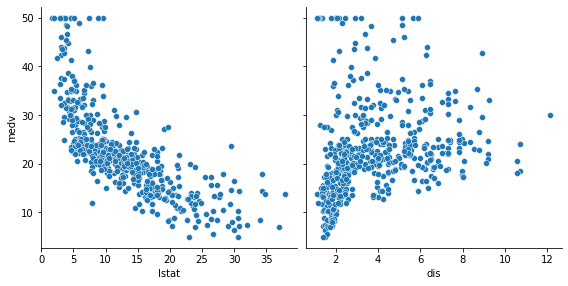

In [ ]:
# operasi visualisasi
sns.pairplot(data, x_vars=['lstat','dis'], 
             y_vars='medv', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

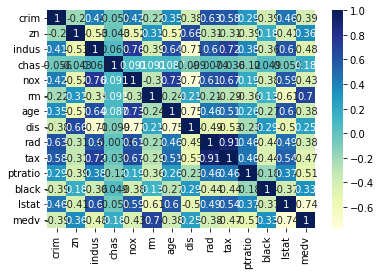

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa lstat memiliki korelasi yang paling kuat terhadap medv

### Regresi Linier

In [ ]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['lstat']
y = data['medv']

In [ ]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [ ]:
# hasil training dtaset
X_train
y_train

463    20.2
75     21.4
478    14.6
199    34.9
84     23.9
       ... 
343    23.9
359    22.6
323    18.5
280    45.4
8      16.5
Name: medv, Length: 354, dtype: float64

In [ ]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    33.720916
lstat    -0.881684
dtype: float64

In [ ]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     423.9
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           2.20e-62
Time:                        08:34:34   Log-Likelihood:                -1131.6
No. Observations:                 354   AIC:                             2267.
Df Residuals:                     352   BIC:                             2275.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7209      0.625     53.923      0.000      32.491      34.951
lstat         -0.8817      0.043    -20.589      0.000      -0.966      -0.797
==============================================================================
Omnibus:                       89.009   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.310
Skew:                           1.359   Prob(JB):                     1.04e-37
Kurtosis:                       5.040   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

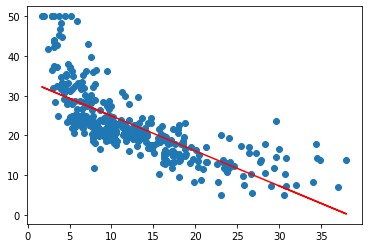

In [ ]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 33.7209 - 0.8817*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [ ]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


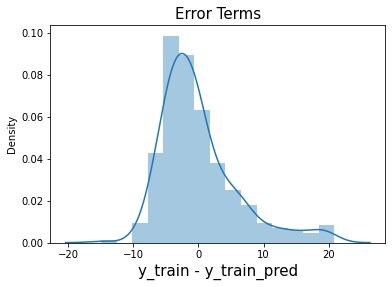

In [ ]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

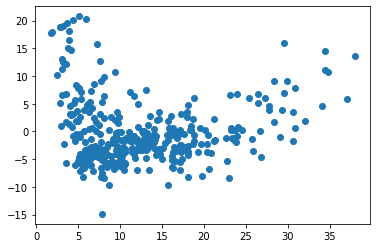

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


198    27.884169
229    30.405785
502    25.715227
31     22.223758
315    23.581552
dtype: float64

In [ ]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.5322297704403378

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.546 sedangkan dari data testing adalah 0.532. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

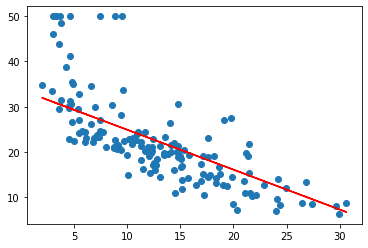

In [ ]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()